In [4]:
import pandas as pd
import os

#### Merge data from each month into one CSV

In [5]:
files = [file for file 
        in os.listdir("D:/Projects_DS/PaNDas_lib/Data_Cleaning_Projects/project_4/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files :
    df = pd.read_csv((r"D:/Projects_DS/PaNDas_lib/Data_Cleaning_Projects/project_4/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" + file))
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("D:/Projects_DS/PaNDas_lib/Data_Cleaning_Projects/project_4/alldata.csv", index=False)

In [7]:
all_data = pd.read_csv(r'D:\Projects_DS\PaNDas_lib\Data_Cleaning_Projects\project_4\alldata.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up the Data

##### Drop rows of NAN


In [8]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### ADD month column


In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]

##### Find 'OR' and delet it

In [16]:
all_data = all_data[all_data['Month'].str[0:2] != 'Or']

#### Convert columns to the correct types

In [17]:
all_data['Month'] = all_data['Month'].astype('int')

In [19]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Augment data with additional columns

#### Add sales column

In [20]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add Street, State and Zip_code columns

In [22]:
all_data[['Street_Address', 'State', 'Zip_Code']] = df['Purchase Address'].str.split(',', expand=True)


In [23]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(",")[1]} ({x.split(",")[2].split(" ")[1]})")

In [24]:
all_data['Purchase Address'].apply(lambda x: f"{x.split(",")[1]} ({x.split(",")[2].split(" ")[1]})")

0                 Dallas (TX)
2                 Boston (MA)
3            Los Angeles (CA)
4            Los Angeles (CA)
5            Los Angeles (CA)
                 ...         
186845       Los Angeles (CA)
186846     San Francisco (CA)
186847     San Francisco (CA)
186848     San Francisco (CA)
186849     San Francisco (CA)
Name: Purchase Address, Length: 185950, dtype: object

# Data Exploration!


### Q1: what was the best month for sales

In [25]:
all_data.groupby('Month').sum(numeric_only=True).sort_values('Month', ascending=False).head(3)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
11,19798,3180600.68,3199603.20
10,22703,3715554.83,3736726.88


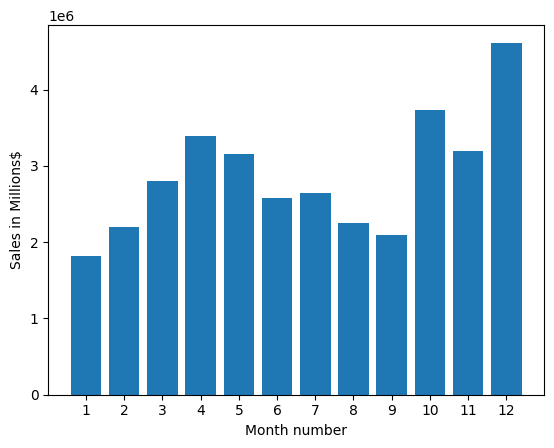

In [26]:
import matplotlib.pyplot as plt

results = all_data.groupby('Month').sum(numeric_only=True)
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Millions$')
plt.xlabel('Month number')
plt.show()

### Q2: What city had the highest number of sales

In [27]:
results1 = all_data.groupby('City').sum(numeric_only=True)

all_data.groupby('City').sum(numeric_only=True).sort_values('Sales', ascending=False).head(3)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43


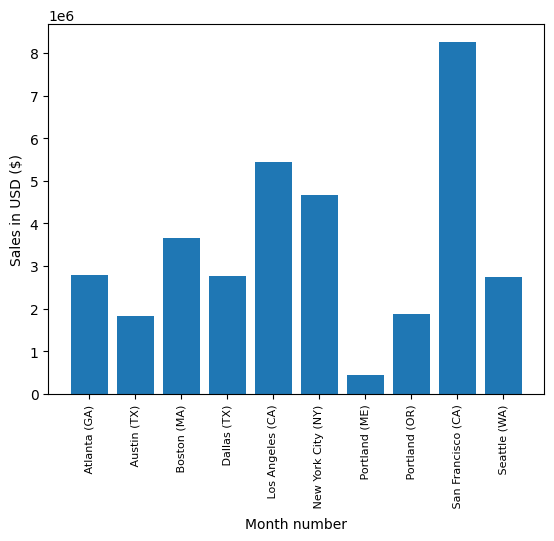

In [28]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby('City')]

plt.bar(keys, results1['Sales'])

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

####  Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [40]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street_Address,State,Zip_Code,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,380 North St,Los Angeles,CA 90001,Dallas (TX),8,46


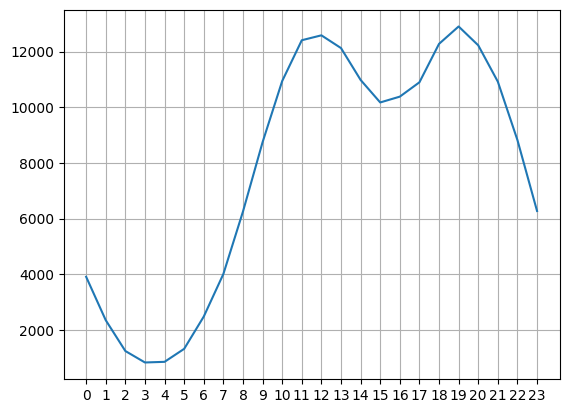

In [42]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count()['Quantity Ordered'])
plt.xticks(hours)
plt.grid()
plt.show()

### My recommendation is around 11am (11) or 7pm (19)

In [39]:
all_data.groupby('Hour').count().sort_values('Quantity Ordered', ascending=False).head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street_Address,State,Zip_Code,City,Minute
Hour,,,,,,,,,,,,,
19,12905,12905,12905,12905,12905,12905,12905,12905,804,804,804,12905,12905
12,12587,12587,12587,12587,12587,12587,12587,12587,768,768,768,12587,12587
11,12411,12411,12411,12411,12411,12411,12411,12411,762,762,762,12411,12411
18,12280,12280,12280,12280,12280,12280,12280,12280,738,738,738,12280,12280
20,12228,12228,12228,12228,12228,12228,12228,12228,758,756,756,12228,12228


#### Q4: What products are most often sold together?

In [47]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(10)

C:\Users\XPRISTO\AppData\Local\Temp\ipykernel_2292\2116743084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [56]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


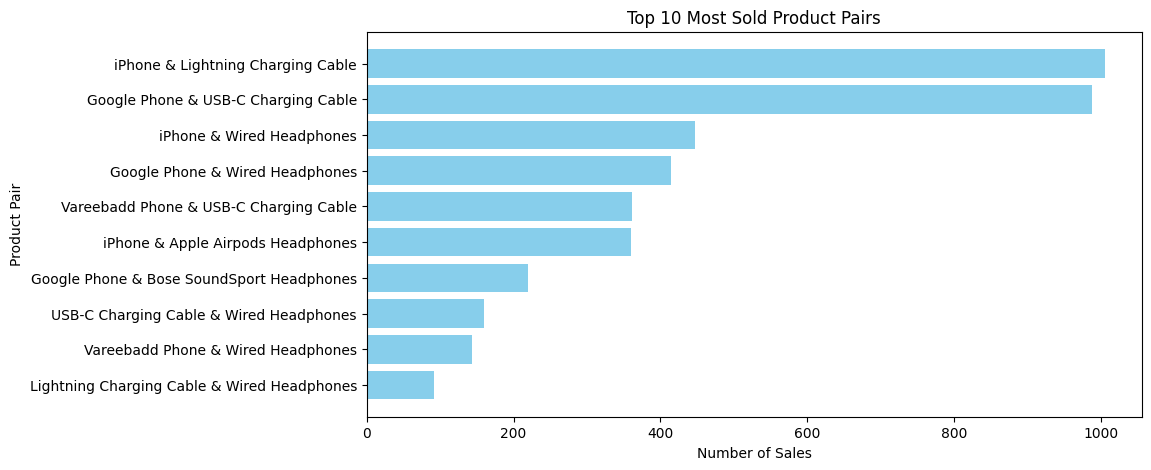

In [57]:
import matplotlib.pyplot as plt

product_combos, sales = zip(*count.most_common(10))

plt.figure(figsize=(10,5))
plt.barh([f"{a} & {b}" for a, b in product_combos], sales, color='skyblue')
plt.xlabel('Number of Sales')
plt.ylabel('Product Pair')
plt.title('Top 10 Most Sold Product Pairs')
plt.gca().invert_yaxis()
plt.show()

#### Q5: What product sold the most? Why do you think it sold the most?

In [67]:
all_data.groupby('Product').sum(numeric_only=True).sort_values('Quantity Ordered', ascending=False)['Quantity Ordered']

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

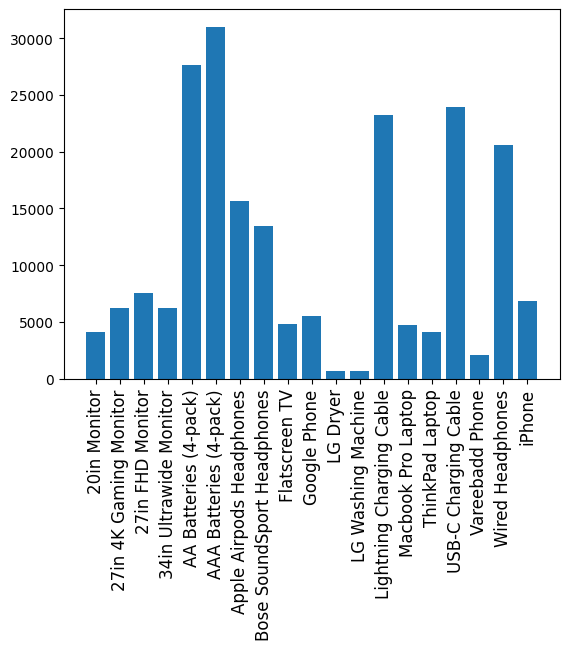

In [72]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

products = [pair for pair, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=12)
plt.show()

C:\Users\XPRISTO\AppData\Local\Temp\ipykernel_2292\2851094435.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\XPRISTO\AppData\Local\Temp\ipykernel_2292\2851094435.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


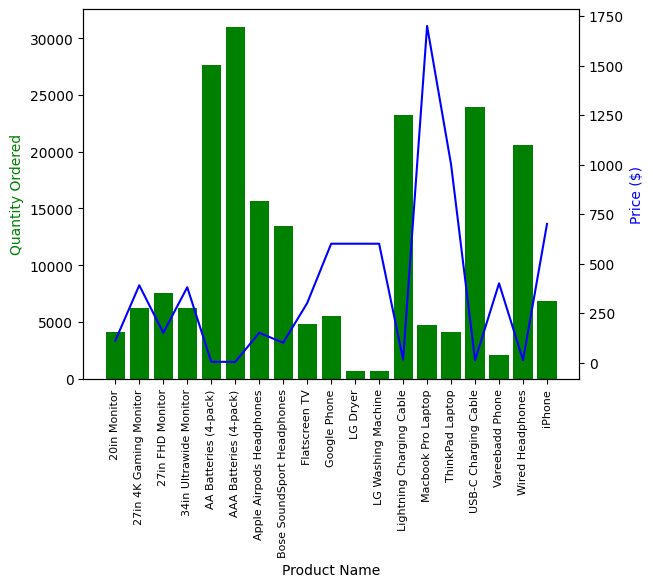

In [75]:
prices = all_data.groupby('Product').mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()